In [4]:
import pandas as pd
import numpy as np
import pandahouse as ph
from datetime import date
import seaborn as sns
import ast
import matplotlib.pyplot as plt

In [5]:
# Работа с clickhouse и pandas

## Part 1

In [6]:
# Объявляем параметры подключения к clickhouse
connection = dict(database='default',
                  host='https://clickhouse.lab.karpov.courses',
                  user='student',
                  password='dpo_python_2020')

In [7]:
query = """
SELECT 
    toFloat32OrNull(replaceRegexpAll(price,'[$,]','')) as price,
    room_type,
    toFloat32OrNull(review_scores_rating) as review_scores_rating
FROM
    ldn_listings
where review_scores_rating is not null


LIMIT 1000
"""

In [8]:
df = ph.read_clickhouse(query, connection=connection)
df

,price,room_type,review_scores_rating
0,65.0,Private room,97.0
1,100.0,Entire home/apt,96.0
2,300.0,Entire home/apt,94.0
3,65.0,Entire home/apt,93.0
4,29.0,Private room,96.0
...,...,...,...
995,165.0,Entire home/apt,100.0
996,99.0,Private room,93.0
997,45.0,Private room,100.0
998,20.0,Private room,88.0


In [9]:
new_tab = df.groupby(['room_type'], as_index=False)\
.agg({'price':'mean', 'review_scores_rating':'mean'}).round()


In [10]:
new_tab = new_tab.rename(columns={'price':'mean_price', 'review_scores_rating' :'mean_rating'})

In [11]:
new_tab

,room_type,mean_price,mean_rating
0,Entire home/apt,136.0,94.0
1,Hotel room,134.0,92.0
2,Private room,55.0,95.0
3,Shared room,21.0,90.0


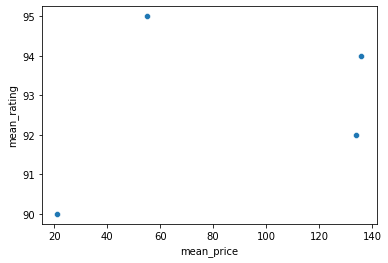

In [12]:
sns.scatterplot(data=new_tab, x='mean_price', y='mean_rating')
None

## Part 2

In [13]:
df.dtypes

price                   float32
room_type                object
review_scores_rating    float32
dtype: object

In [14]:
query1 = """
SELECT 
    DISTINCT host_id,
    host_verifications
FROM
    ldn_listings
WHERE 
    experiences_offered != 'none'

"""

In [15]:
data = ph.read_clickhouse(query1, connection=connection)
data

,host_id,host_verifications
0,54730,"['email', 'phone', 'facebook', 'reviews', 'off..."
1,60302,"['email', 'phone', 'reviews', 'jumio', 'govern..."
2,67915,"['email', 'phone', 'jumio', 'selfie', 'governm..."
3,167107,"['email', 'phone', 'manual_offline', 'jumio', ..."
4,103583,"['email', 'phone', 'reviews', 'offline_governm..."
...,...,...
1356,21558962,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1357,21257846,"['email', 'phone', 'reviews', 'jumio', 'offlin..."
1358,34219613,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1359,34299581,"['email', 'phone', 'google', 'reviews', 'jumio..."


In [16]:
data.dtypes

host_id               uint32
host_verifications    object
dtype: object

In [17]:
data['host_verifications'].explode('host_verifications')

0       ['email', 'phone', 'facebook', 'reviews', 'off...
1       ['email', 'phone', 'reviews', 'jumio', 'govern...
2       ['email', 'phone', 'jumio', 'selfie', 'governm...
3       ['email', 'phone', 'manual_offline', 'jumio', ...
4       ['email', 'phone', 'reviews', 'offline_governm...
                              ...                        
1356    ['email', 'phone', 'reviews', 'jumio', 'govern...
1357    ['email', 'phone', 'reviews', 'jumio', 'offlin...
1358    ['email', 'phone', 'reviews', 'jumio', 'govern...
1359    ['email', 'phone', 'google', 'reviews', 'jumio...
1360    ['email', 'phone', 'reviews', 'manual_offline'...
Name: host_verifications, Length: 1361, dtype: object

In [18]:
def delete_elements(lst):
    for j in lst:
        d = {}
        k = lst.count(j)
        d[j] = k
        for element in range(k): ####### Доделать функцию
            lst.remove(j)
            
            
            
            
            
            
            

In [19]:
data

,host_id,host_verifications
0,54730,"['email', 'phone', 'facebook', 'reviews', 'off..."
1,60302,"['email', 'phone', 'reviews', 'jumio', 'govern..."
2,67915,"['email', 'phone', 'jumio', 'selfie', 'governm..."
3,167107,"['email', 'phone', 'manual_offline', 'jumio', ..."
4,103583,"['email', 'phone', 'reviews', 'offline_governm..."
...,...,...
1356,21558962,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1357,21257846,"['email', 'phone', 'reviews', 'jumio', 'offlin..."
1358,34219613,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1359,34299581,"['email', 'phone', 'google', 'reviews', 'jumio..."


In [20]:
new_dataframe = data

In [21]:
for row in  range(data.shape[0]):
    x = new_dataframe['host_verifications'][row]
    x = ast.literal_eval(x)                              ####Попрробовать через replace
    y = [n.strip() for n in x]
    new_dataframe['host_verifications'][row] = y
None


<ipython-input-21-f0bdf778dd83>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['host_verifications'][row] = y


In [22]:
new_dataframe.explode('host_verifications').host_verifications.value_counts().to_frame(name='count')  # переименовываем "A" в "count"

,count
phone,1361
email,1345
reviews,1309
government_id,1196
jumio,1115
offline_government_id,469
work_email,279
facebook,270
selfie,252
identity_manual,227


In [23]:
new_dataframe

,host_id,host_verifications
0,54730,"[email, phone, facebook, reviews, offline_gove..."
1,60302,"[email, phone, reviews, jumio, government_id]"
2,67915,"[email, phone, jumio, selfie, government_id, i..."
3,167107,"[email, phone, manual_offline, jumio, offline_..."
4,103583,"[email, phone, reviews, offline_government_id,..."
...,...,...
1356,21558962,"[email, phone, reviews, jumio, government_id]"
1357,21257846,"[email, phone, reviews, jumio, offline_governm..."
1358,34219613,"[email, phone, reviews, jumio, government_id]"
1359,34299581,"[email, phone, google, reviews, jumio, offline..."


## Part 3


In [24]:
query2 = """
SELECT 
    neighbourhood_cleansed,
    experiences_offered,
    COUNT(experiences_offered) AS experiences_count

FROM
    ldn_listings
WHERE 
    experiences_offered != 'none'
group by
    neighbourhood_cleansed,
    experiences_offered
order by 
    experiences_count desc 
limit 100
    
"""

In [25]:
data = ph.read_clickhouse(query2, connection=connection) 

In [26]:
data_pivot = data.pivot(index='neighbourhood_cleansed', columns='experiences_offered', values='experiences_count')

In [27]:
data_pivot = data_pivot.fillna(0)

In [50]:
data_pivot

experiences_offered,business,family,romantic,social
neighbourhood_cleansed,,,,
Barking and Dagenham,0.0,0.0,0.0,2.0
Barnet,7.0,7.0,3.0,5.0
Bexley,1.0,0.0,0.0,0.0
Brent,9.0,21.0,5.0,6.0
Bromley,3.0,2.0,0.0,4.0
Camden,36.0,30.0,19.0,25.0
City of London,7.0,1.0,0.0,0.0
Croydon,2.0,3.0,0.0,4.0
Ealing,6.0,13.0,0.0,5.0


In [3]:
cmap=sns.cubehelix_palette(as_cmap=True)
plt.figure(figsize=(20,20))
sns.heatmap(data_pivot)
None


NameError: name 'sns' is not defined

## Part 4

In [141]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(30,15)}
        )

In [125]:


query3 = """
SELECT 
    toFloat32OrNull(replaceRegexpAll(price, '[$]','')) as new_price,
    room_type

FROM
    ldn_listings
WHERE 
    experiences_offered != 'none'
limit 1000
"""
    



In [126]:
data = ph.read_clickhouse(query3, connection=connection) 

In [127]:
data = data.sort_values('room_type', ascending=False)

In [146]:
data['logprice'] = np.log(data['new_price'])
data

,new_price,room_type,logprice
794,70.0,Shared room,4.248495
370,25.0,Shared room,3.218876
745,30.0,Shared room,3.401197
268,23.0,Shared room,3.135494
582,18.0,Shared room,2.890372
...,...,...,...
552,90.0,Entire home/apt,4.499810
553,160.0,Entire home/apt,5.075174
162,109.0,Entire home/apt,4.691348
161,200.0,Entire home/apt,5.298317


In [147]:
data['room_type'].value_counts()

Entire home/apt    566
Private room       426
Shared room          5
Hotel room           3
Name: room_type, dtype: int64

In [134]:
unique_vals = data['room_type'].unique()
unique_vals

array(['Shared room', 'Private room', 'Hotel room', 'Entire home/apt'],
      dtype=object)

In [135]:
targets = [data.loc[data['room_type'] == val] for val in unique_vals]


In [ ]:
for target in targets:
    sns.distplot(target[['sepal length (cm)']], hist=False, rug=True)

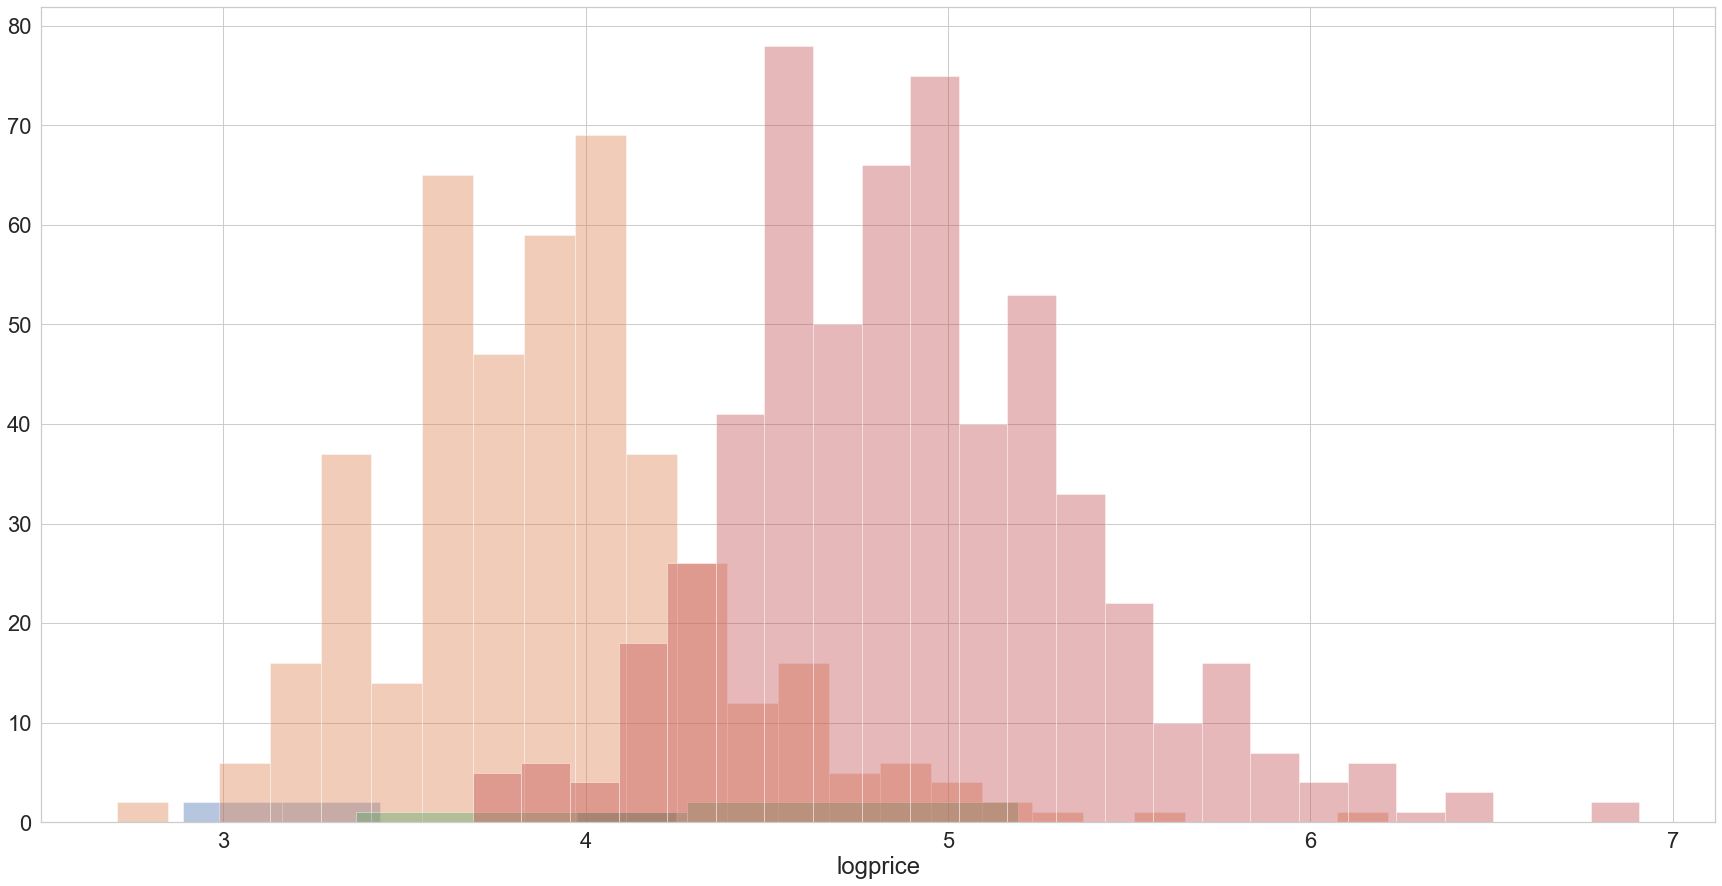

In [151]:


unique_vals = data['room_type'].unique()  # [0, 1, 2]

# Sort the dataframe by target
# Use a list comprehension to create list of sliced dataframes
targets = [data.loc[data['room_type'] == val] for val in unique_vals]

# Iterate through list and plot the sliced dataframe
for target in targets:
    sns.distplot(target['logprice'], kde=False)


C:\Users\IVAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


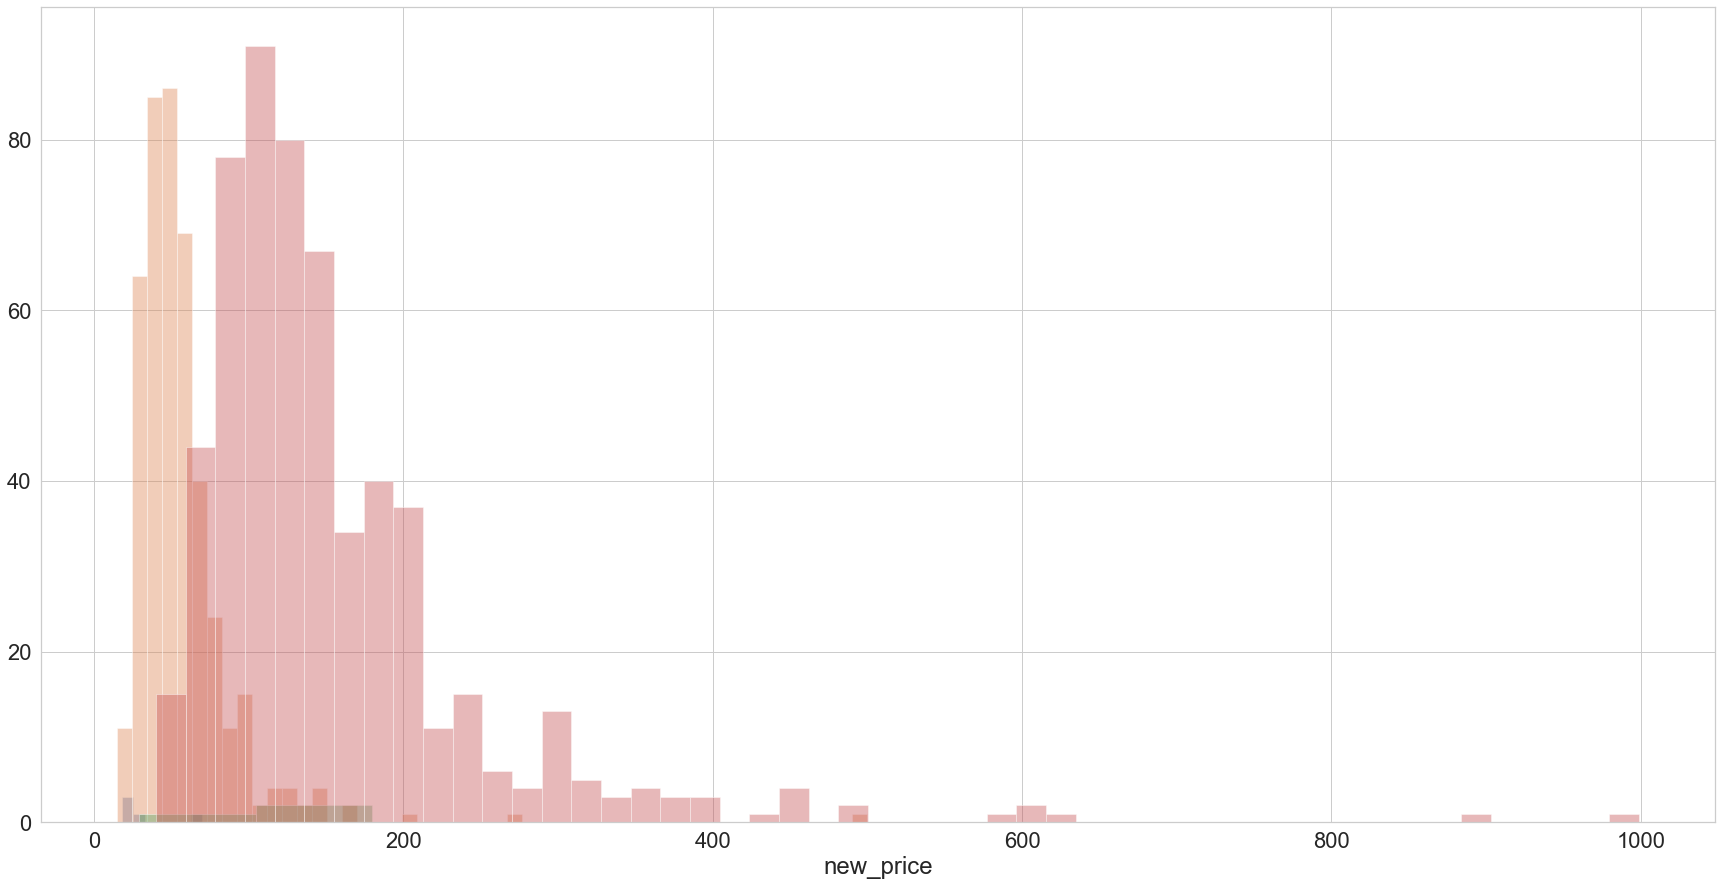

In [150]:
unique_vals = data['room_type'].unique()  # [0, 1, 2]

# Sort the dataframe by target
# Use a list comprehension to create list of sliced dataframes
targets = [data.loc[data['room_type'] == val] for val in unique_vals]

# Iterate through list and plot the sliced dataframe
for target in targets:
    sns.distplot((target['new_price']), kde=False)


## Part 5

In [235]:


query4 = """
SELECT 
    room_type,
    toFloat32OrNull(replaceRegexpAll(price, '[$]','')) as new_price,
    first_review

    
FROM
    ldn_listings
WHERE
    first_review > '2010-01-01'
LIMIT 1000
"""

In [236]:
data = ph.read_clickhouse(query4, connection=connection) 

In [237]:
data['first_review'] = pd.to_datetime(data['first_review'])

In [238]:
data

,room_type,new_price,first_review
0,Private room,65.0,2010-08-18
1,Entire home/apt,300.0,2011-03-21
2,Entire home/apt,65.0,2016-03-05
3,Private room,29.0,2010-04-14
4,Private room,100.0,2010-10-16
...,...,...,...
995,Private room,45.0,2012-11-07
996,Private room,51.0,2013-03-18
997,Entire home/apt,79.0,2012-09-17
998,Entire home/apt,110.0,2012-09-24


In [ ]:
data

In [239]:
for row in range(data.shape[0]):
    data['first_review'][row] = data['first_review'][row].year
    
    

<ipython-input-239-c31cdd80925f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['first_review'][row] = data['first_review'][row].year


In [240]:
data = data.groupby(['room_type', 'first_review'], as_index=False)\
.agg({'new_price':'mean'})\
.sort_values(['room_type', 'first_review'])\
.rename(columns={'new_price':'avg_price'})


In [241]:
data

,room_type,first_review,avg_price
0,Entire home/apt,2010,103.500000
1,Entire home/apt,2011,128.792450
2,Entire home/apt,2012,135.467255
3,Entire home/apt,2013,137.887634
4,Entire home/apt,2014,154.583328
5,Entire home/apt,2015,159.380951
6,Entire home/apt,2016,99.733330
7,Entire home/apt,2017,111.666664
8,Entire home/apt,2018,125.066666
9,Entire home/apt,2019,301.666656


In [229]:
data = data.pivot(index='room_type', columns='first_review', values='avg_price')

In [231]:
data.fillna(0)

first_review,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
room_type,,,,,,,,,,,
Entire home/apt,103.50000,128.792450,135.467255,137.887634,154.583328,159.380951,99.733330,111.666664,125.066666,301.666656,50.0
Hotel room,88.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.0
Private room,56.42857,52.607143,53.269840,57.036587,56.842106,48.058823,57.307693,51.142857,55.416668,74.000000,39.0
Shared room,0.00000,0.000000,22.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


<AxesSubplot:xlabel='first_review', ylabel='avg_price'>

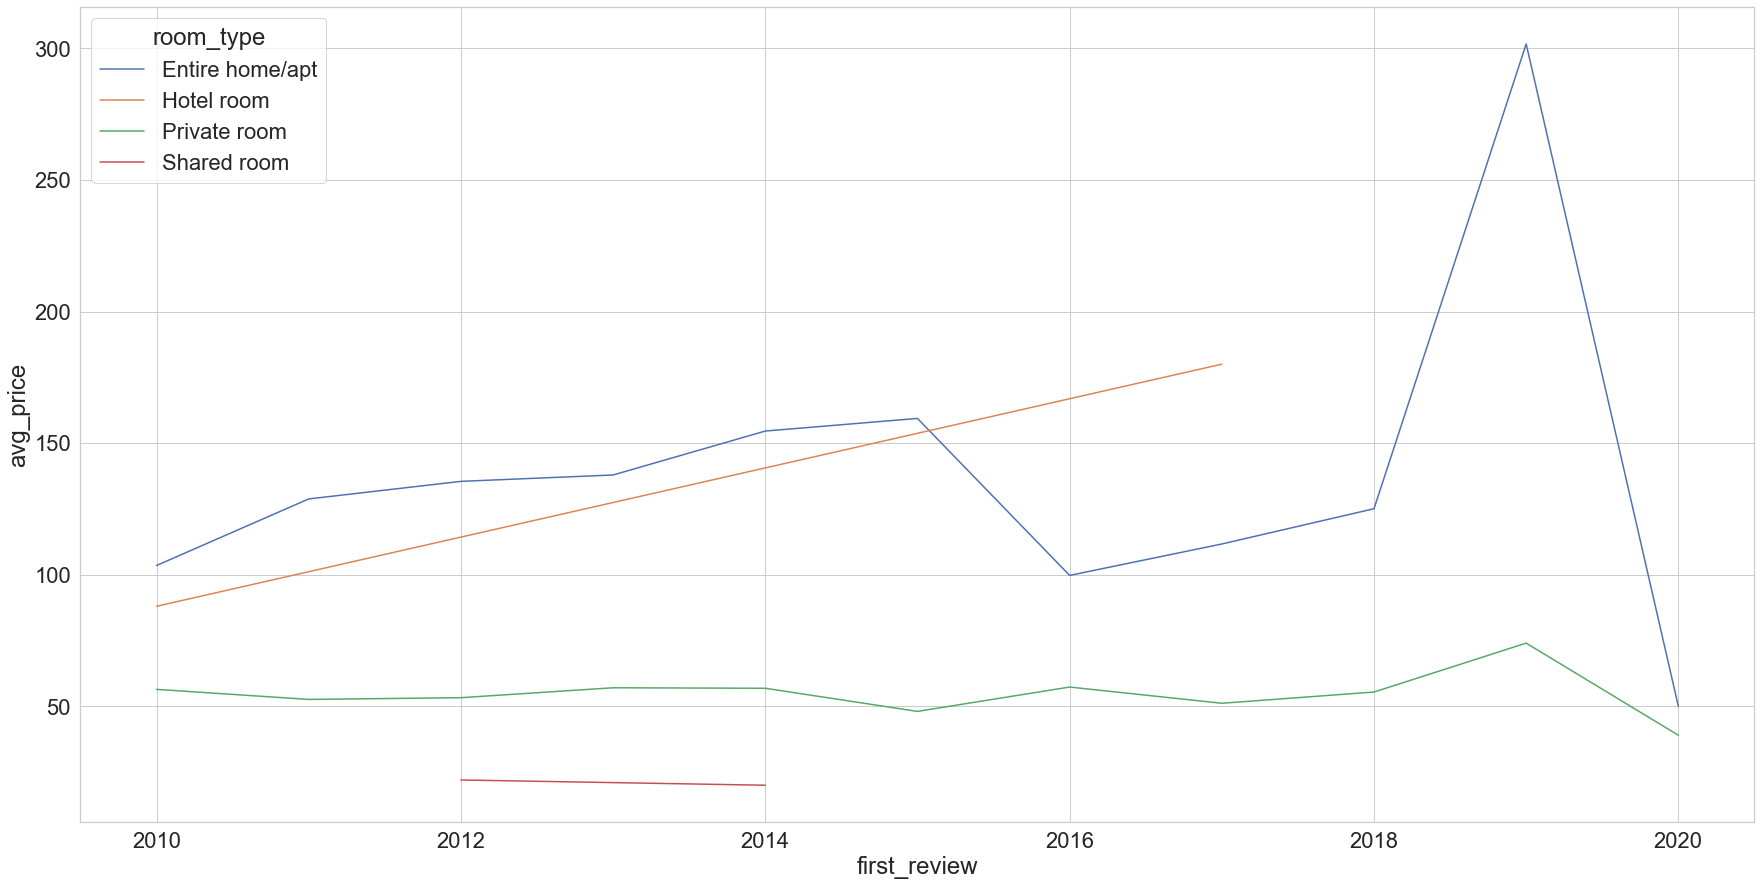

In [242]:
sns.lineplot(data=data, x='first_review', y='avg_price', hue='room_type')

